# I.Import et etudes fichiers

In [260]:
# installations et imports des autres packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fonctions as fc

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [261]:
# file path
data_file_path = "DATA\data_standard.csv"
standard = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_robust.csv"
robust = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_minmax.csv"
minmax = pd.read_csv(data_file_path)

# Feature enginering

In [262]:
nb_clusters = 9

In [263]:
# selection du poids de la colonne
poids_prod = 2
poids_exp = 1
poids_imp = 1
poids_dispo_int = 1
poids_disp_prot = 3
poids_pib = 2
poids_politique = 3

In [264]:
# choix du datraframe
# data = robust
# data = standard
data = minmax

In [265]:
data.shape

(167, 9)

In [266]:
data.head()

,Zone,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant,Political_Stability
0,Afghanistan,0.397574,0.266563,0.530050,0.532928,0.277960,0.111509,0.043979,0.032037
1,Afrique du Sud,0.896025,0.470321,0.541643,0.774152,0.849252,0.175235,0.499026,0.672769
2,Albanie,0.771880,0.627681,0.530050,0.811916,0.555392,0.008713,0.427950,0.759725
3,Algérie,0.595273,0.350841,0.530050,0.253678,0.616369,0.127178,0.411931,0.462243
4,Allemagne,0.808579,0.401911,0.768581,0.786301,0.775736,0.254147,0.838239,0.672769


In [267]:
#Les colonnes à qui accorder le plus d'importance
data['Production / Population'] = np.exp(data['Production / Population']) * poids_prod
data['Exportations / Population'] = np.exp(data['Exportations / Population'])* poids_exp
data['Importations / Population'] = data['Importations / Population']* poids_imp
data['Disponibilité de protéines en quantité (kg/personne)'] = data['Disponibilité de protéines en quantité (kg/personne)'] * poids_disp_prot
data['PIB US $ par habitant'] = data['PIB US $ par habitant'] * poids_pib
data['Disponibilité intérieure/ Population'] = data['Disponibilité intérieure/ Population'] * poids_dispo_int
data['Political_Stability'] = data['Political_Stability'] * poids_politique

In [268]:
data_num = data.select_dtypes(include=[np.number])
pays = data['Zone']

# V.PCA

In [269]:
import pandas as pd
from sklearn.decomposition import PCA

def apply_pca(X):
    """
    Applique l'Analyse en Composantes Principales (ACP) sur les données X.

    Parameters:
        X (DataFrame): Les données d'entrée.

    Returns:
        pca (PCA): L'objet PCA ajusté.
    """
    # Créer les composantes principales
    pca = PCA()
    X_acp = pca.fit_transform(X)
    # Convertir en dataframe
    noms_composantes = [f"CP{i+1}" for i in range(X_acp.shape[1])]
    X_acp = pd.DataFrame(X_acp, columns=noms_composantes)
    # Créer les chargements
    chargements = pd.DataFrame(
        pca.components_.T,  # transposer la matrice des chargements
        columns=noms_composantes,  # les colonnes sont les composantes principales
        index=X.columns,  # les lignes sont les variables originales
    )
    return pca

def plot_variance(acp, largeur=8, dpi=100):
    """
    Trace les graphiques de la variance expliquée et cumulative de l'ACP.

    Parameters:
        acp (PCA): L'objet PCA ajusté.
        largeur (int): La largeur de la figure.
        dpi (int): La résolution de la figure.

    Returns:
        axs (array): Les axes des graphiques.
    """
    # Créer la figure
    fig, axs = plt.subplots(1, 2)
    n = acp.n_components_
    grille = np.arange(1, n + 1)
    # Variance expliquée
    variance_exp = acp.explained_variance_ratio_
    axs[0].bar(grille, variance_exp)
    axs[0].set(
        xlabel="Composante", title="% Variance Expliquée", ylim=(0.0, 1.0)
    )
    # Variance cumulative
    variance_cumul = np.cumsum(variance_exp)
    axs[1].plot(np.r_[0, grille], np.r_[0, variance_cumul], "o-")
    axs[1].set(
        xlabel="Composante", title="% Variance Cumulative", ylim=(0.0, 1.0)
    )
    # Configurer la figure
    fig.set(figwidth=largeur, dpi=dpi)
    return axs

In [270]:
pca = apply_pca(data_num)

array([<Axes: title={'center': '% Variance Expliquée'}, xlabel='Composante'>,
       <Axes: title={'center': '% Variance Cumulative'}, xlabel='Composante'>],
      dtype=object)

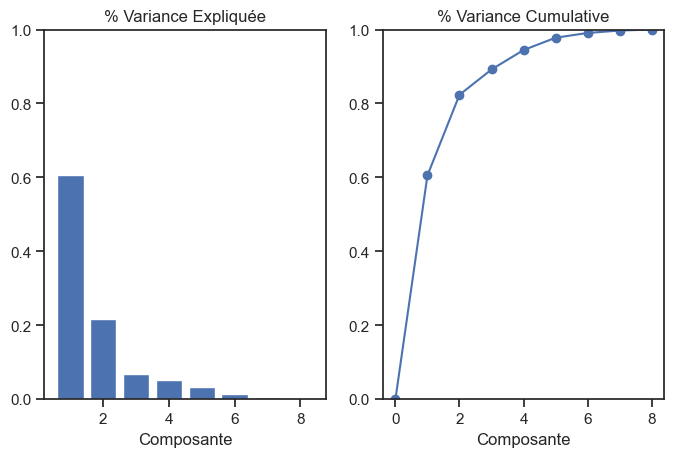

In [271]:
# Call the plot_variance function
plot_variance(pca)

Notre colonne F1 explique à elle seul 77% de l'information contneu dans nos données d'origine.

Nos deux colonnes F1 et F2 explique 87% de l'information contenu dans nos données d'origine.

Nos trois colonnes F1, F2 et F3 explique 96% de l'information contenu dans nos données d'origine.

## ACP 3 component

In [272]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(data_num)

PCA(n_components=3)

In [273]:
# Obtenir les composantes principales
pcs = pca.components_

# Convertir les composantes principales en un DataFrame
pcs = pd.DataFrame(pcs)

# Définir les noms des colonnes du DataFrame comme les noms des variables originales
features = data_num.columns
pcs.columns = features

# Définir les index du DataFrame comme les noms des composantes principales (F1, F2)
x_list = list(range(1, len(pcs) + 1))
pcs.index = [f"F{i}" for i in x_list]

# Arrondir les valeurs du DataFrame à deux décimales
pcs.round(2)

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant,Political_Stability
F1,-0.45,-0.09,-0.09,-0.05,-0.72,0.00,-0.39,-0.32
F2,0.12,0.17,0.06,0.20,-0.55,-0.10,0.20,0.75
F3,0.60,0.17,-0.15,0.22,-0.35,-0.01,0.36,-0.54


In [274]:
def plot_all_pca_correlation_circles(pca, features):
    n_components = pca.n_components_
    fig, axs = plt.subplots(n_components-1, n_components-1, figsize=(15, 15))

    for i in range(n_components):
        for j in range(i+1, n_components):
            ax = axs[i, j-1]  # j-1 car il n'y a pas de subplot pour i=j
            for k in range(0, pca.components_.shape[1]):
                ax.arrow(0, 0, pca.components_[i, k], pca.components_[j, k], head_width=0.07, head_length=0.07, width=0.02)
                ax.text(pca.components_[i, k] + 0.05, pca.components_[j, k] + 0.05, features[k])
            ax.plot([-1, 1], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-1, 1], color='grey', ls='--')
            ax.set_xlabel('F{} ({}%)'.format(i+1, round(100*pca.explained_variance_ratio_[i],1)))
            ax.set_ylabel('F{} ({}%)'.format(j+1, round(100*pca.explained_variance_ratio_[j],1)))
            ax.set_title("Cercle des corrélations (F{} et F{})".format(i+1, j+1))
            an = np.linspace(0, 2 * np.pi, 100)
            ax.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
            ax.axis('equal')

    plt.tight_layout()
    plt.show(block=False)

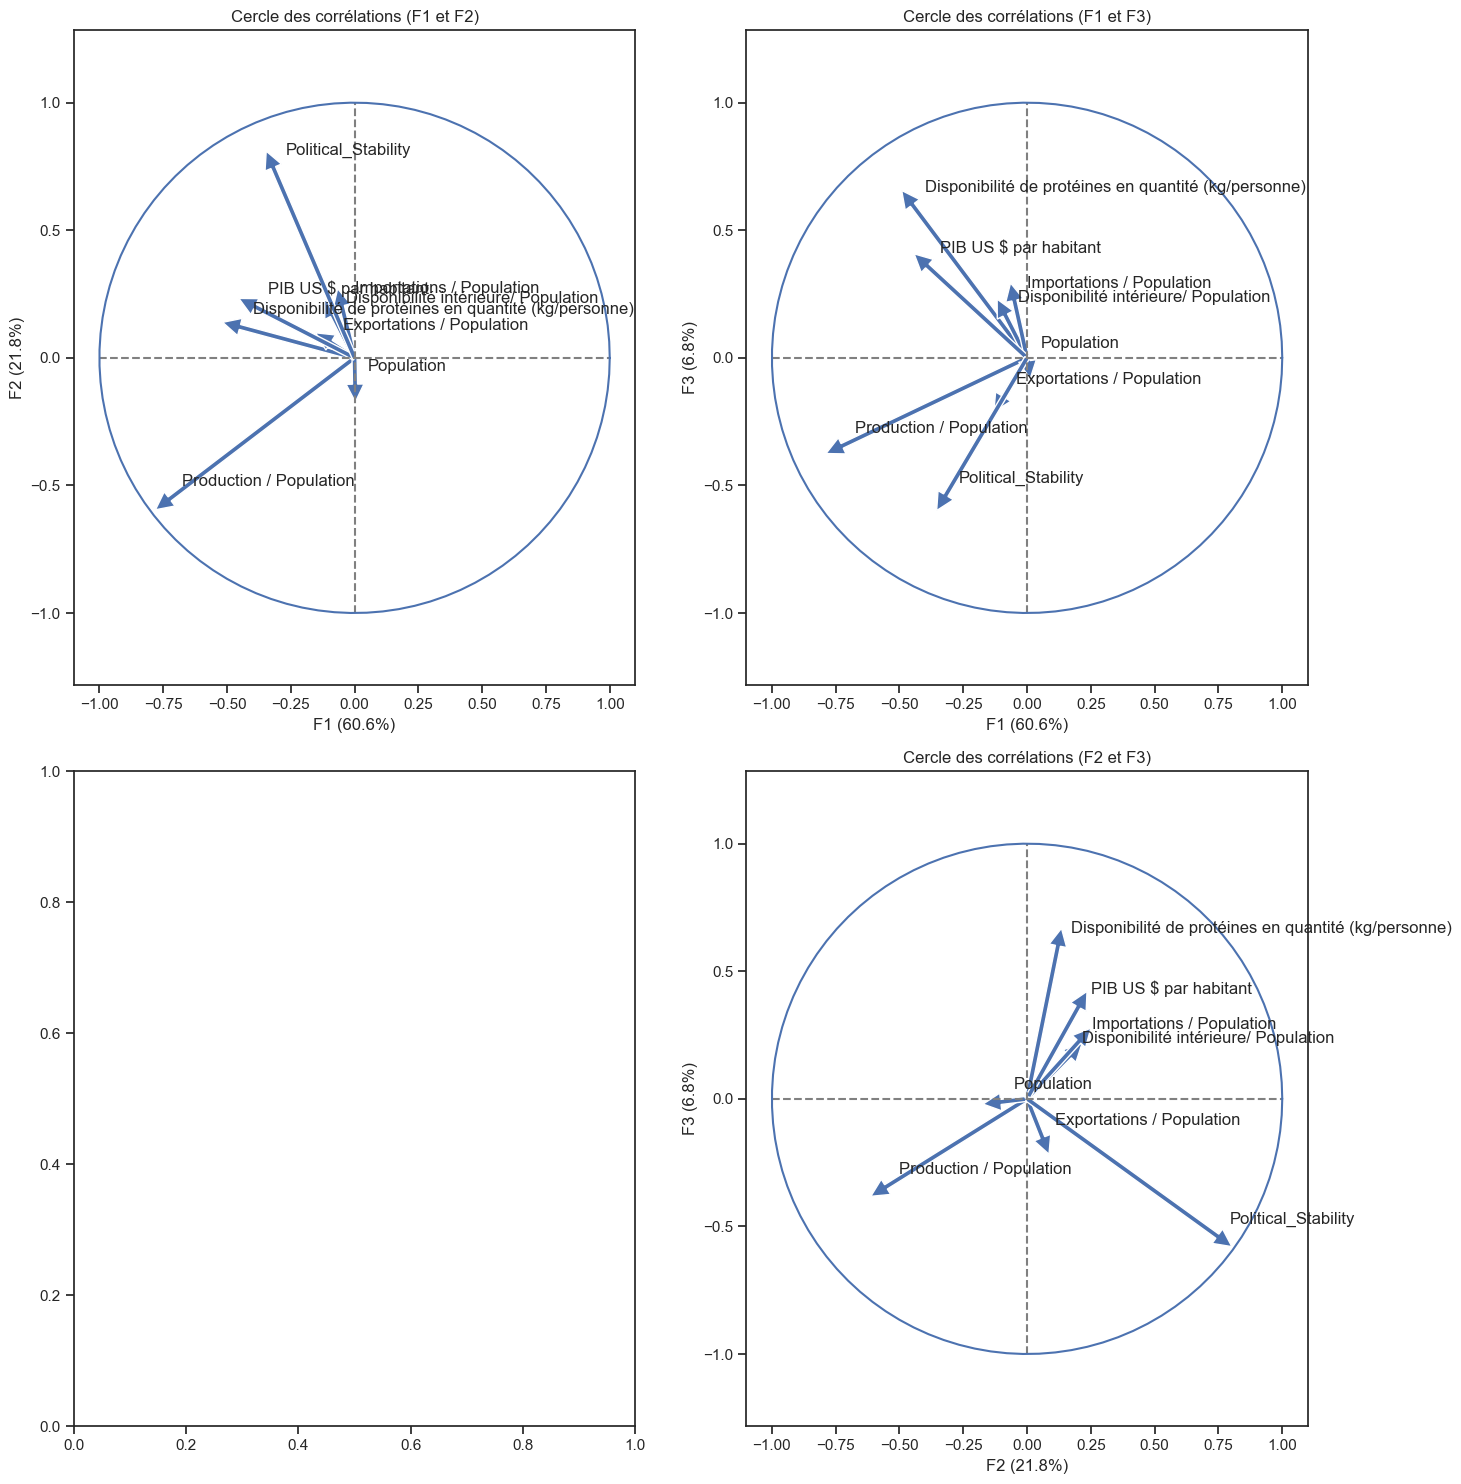

In [275]:
# Utilisation de la fonction
plot_all_pca_correlation_circles(pca, features)

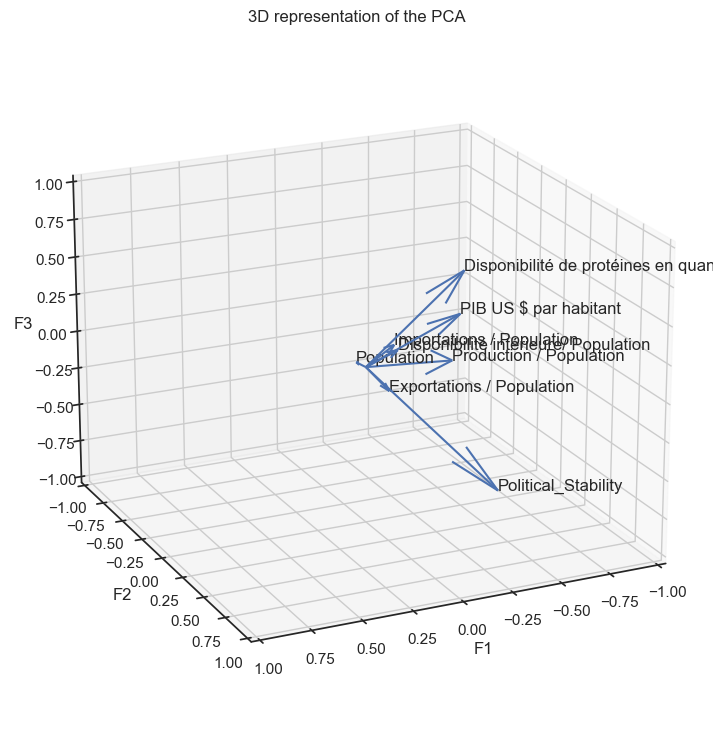

In [276]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

for i in range(pca.components_.shape[1]):
    ax.quiver(0, 0, 0,
              pca.components_[0, i], pca.components_[1, i], pca.components_[2, i])

    ax.text(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], features[i])

ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title("3D representation of the PCA")

# Définir les limites des axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.view_init(elev=20, azim=65)
plt.show()

In [277]:
import plotly.graph_objects as go

scaling_factor = 1.5  # Adjust the scaling factor as desired

fig = go.Figure()

for i in range(pca.components_.shape[1]):
    # Add a line for the vector
    fig.add_trace(go.Scatter3d(
        x=[0, pca.components_[0, i] * scaling_factor],
        y=[0, pca.components_[1, i] * scaling_factor],
        z=[0, pca.components_[2, i] * scaling_factor],
        mode='lines',
        name=features[i]
    ))

    # Add a cone for the arrowhead
    fig.add_trace(go.Cone(
        x=[pca.components_[0, i] * scaling_factor],
        y=[pca.components_[1, i] * scaling_factor],
        z=[pca.components_[2, i] * scaling_factor],
        u=[pca.components_[0, i] * scaling_factor],
        v=[pca.components_[1, i] * scaling_factor],
        w=[pca.components_[2, i] * scaling_factor],
        sizemode="absolute",
        sizeref=0.2,
        anchor="cm"
    ))

fig.update_layout(
    title="3D representation of the PCA",
    scene=dict(
        xaxis_title='F1',
        yaxis_title='F2',
        zaxis_title='F3',
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.2, y=1.2, z=0.6))
    ),
    legend=dict(
        yanchor="top",
        y=0.1,
        xanchor="left",
        x=0.001
    )
)

fig.show()

In [278]:
import plotly.graph_objects as go

principal_components_pivot = pca.fit_transform(data_num)

fig = go.Figure(data=[go.Scatter3d(
    x=principal_components_pivot[:, 0],
    y=principal_components_pivot[:, 1],
    z=principal_components_pivot[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8
    )
)])

fig.update_layout(
    title='ACP - Vue en 3D',
    scene = dict(
        xaxis_title='Composante principale 1',
        yaxis_title='Composante principale 2',
        zaxis_title='Composante principale 3'
    )
)

fig.show()

In [279]:
X_proj = pca.transform(data_num)
df = pd.DataFrame(X_proj, columns = ["F1", "F2","F3"])
df_test = df.copy()
df.head()

,F1,F2,F3
0,2.266964,-1.071002,0.457815
1,-0.879198,-0.321601,0.030163
2,0.109542,0.507469,0.065912
3,0.537434,-0.521401,-0.032069
4,-0.821921,-0.024524,0.155151


# PIPE  

## Dendogramme

In [280]:
# # Créer le pipeline pour le dendogramme
# pipe_dendogramme = Pipeline([
#     ('scaler', StandardScaler()),
#     ('agg', AgglomerativeClustering(n_clusters=nb_clusters, linkage='ward'))
# ])


# def create_dendrogram(df, pipe_dendogramme):
#     """Crée et affiche un dendrogramme pour un DataFrame donné, en utilisant un pipeline donné."""
#     Z = linkage(pipe_dendogramme['scaler'].transform(df), method='ward')
#     clusters = fcluster(Z, 3, criterion='maxclust')
#     plt.figure(figsize=(10, 7))
#     dendrogram(Z)
#     plt.show()

In [281]:
# # Ajuster le pipeline
# pipe_dendogramme.fit(df)
# create_dendrogram(df, pipe_dendogramme)

## Kmeans

In [282]:
# # créer le pipeline pour le kmeans
# pipe_kmeans = Pipeline([
#     ('scaler', StandardScaler()),
#     ('kmeans', KMeans(n_clusters=nb_clusters, random_state=0))
# ])

In [283]:
# # ajuster le pipeline]
# pipe_kmeans.fit(df)

# IV. CAH -- Dendogramme

Nous allons effectuer une classification ascendante hiérarchique avec la méthode de ward. Cette méthode est utilisé pour calculer les distances entre cluster et minimiser la variance intra cluster.

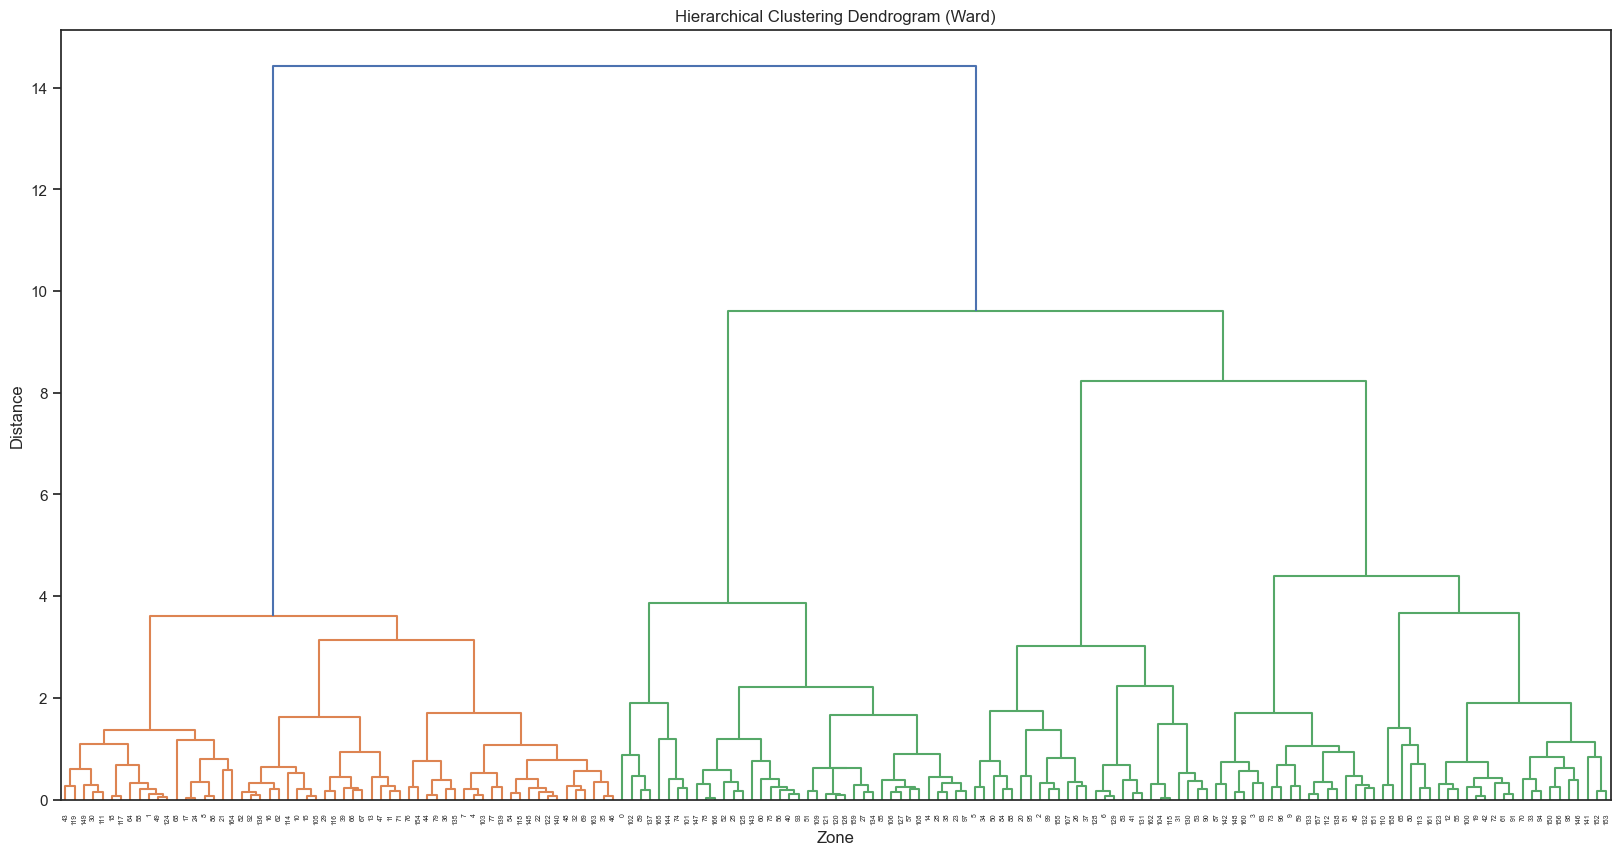

In [284]:
# création du modèle
Z = linkage(df, 'ward')

# Afficher le dendrogramme
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Zone')
plt.ylabel('Distance')
dendrogram(Z,  leaf_rotation=90)
plt.show()

Nous allons selectionenr le nombre de clusters qui nous intéressent.


In [285]:
# Coupage du dendrogramme en clusters
clusters = fcluster(Z, nb_clusters, criterion='maxclust')

# VI.Kmeans

Nous allons utiliser la méthode du coude et le score de silhouette afin de trouver le nombre de clusters que nous allons définir pour notre Kmeans.

In [286]:
# Import the os module
import os
# Set the environment variable 'OMP_NUM_THREADS' to '1'
os.environ['OMP_NUM_THREADS'] = '1'

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

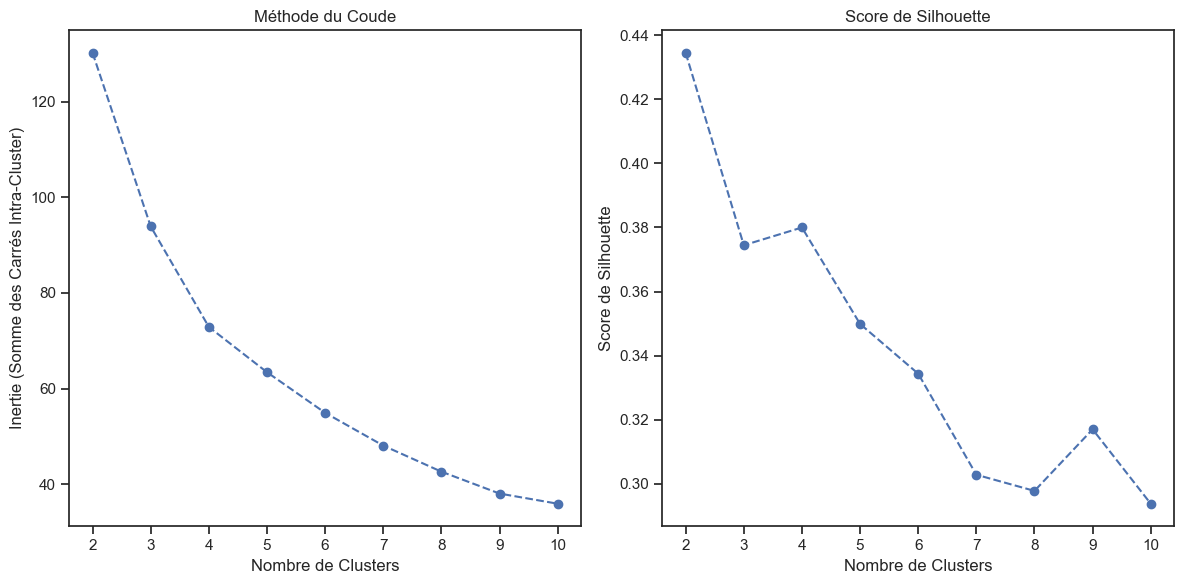

In [287]:
# Définir une plage de nombres de clusters à tester
plage_de_clusters = range(2, 11) 

# Listes pour stocker l'inertie et les scores de silhouette
valeurs_inertie = []
scores_silhouette = []

# Itérer à travers différents nombres de clusters et ajuster K-Means
for n_clusters in plage_de_clusters:
    kmeans_pivot = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters_pivot = kmeans_pivot.fit_predict(df_test)

    # Calculer l'inertie (somme des carrés intra-cluster)
    valeurs_inertie.append(kmeans_pivot.inertia_)

    # Calculer le score de silhouette
    scores_silhouette.append(silhouette_score(df_test, clusters_pivot))

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(plage_de_clusters, valeurs_inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (Somme des Carrés Intra-Cluster)')
plt.title('Méthode du Coude')

# Tracer le Score de Silhouette pour déterminer le nombre optimal de clusters
plt.subplot(1, 2, 2)
plt.plot(plage_de_clusters, scores_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')

plt.tight_layout()
plt.show()

Méthode du Coude (Elbow Method) :

La Méthode du Coude consiste à trouver le point dans un graphique de l'inertie où la diminution de l'inertie ralentit, formant un coude.
Ce point représente généralement le nombre optimal de clusters dans une analyse de clustering.

Score de Silhouette (Silhouette Score) :

Le Score de Silhouette mesure à quel point les points d'un cluster sont similaires entre eux et différents des autres clusters.
Il varie de -1 à 1, où un score élevé indique une meilleure séparation des clusters.
Le nombre optimal de clusters est généralement celui qui donne le score de silhouette le plus élevé.

Nous allons garder 9 clusters, le nombre optimal de clusters au vu des résultats serait 3. Cependant pour l'analyse métier avoir des cluster plsu petit et précis vont eprmettre d'affiner notre analyse. 

In [288]:
# Importer la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Créer une instance de la classe KMeans avec 2 clusters
kmeans = KMeans(n_clusters=nb_clusters, n_init=10, random_state=42)

# Entraîner le modèle KMeans sur les données numériques
kmeans.fit(df_test)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=9, n_init=10, random_state=42)

On va cherche les labels de nôre Kmeans afin d'attribuer plus tard un cluster à chaque pays

In [289]:
# Obtenir les labels attribués par KMeans à chaque échantillon
labels = kmeans.labels_
labels[:10]

array([7, 8, 3, 6, 2, 1, 3, 2, 8, 6])

In [290]:
# Ajouter la colonne 'cluster_kmeans' au dataframe 'data' avec les labels attribués par KMeans
df['cluster_kmeans'] = kmeans.labels_

In [291]:
import plotly.express as px

fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='cluster_kmeans', color_continuous_scale='Viridis')

fig.update_layout(title='Graphique des clusters en 3D')
fig.show()

Ajoutons les centroids de nos clusters

In [292]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.33155201, -0.74335297,  0.17017133],
       [ 1.22303558,  0.18880945, -0.16359548],
       [-0.70984673,  0.24828593, -0.03227991],
       [ 0.10124971,  0.98630623,  0.36372297],
       [ 0.81209383, -1.18244336,  0.68387848],
       [-1.41239203,  0.14932226, -0.27510308],
       [ 0.39960453, -0.09544955, -0.09323474],
       [ 2.02505398, -0.56867909, -0.08038166],
       [-1.14201987, -0.52070504, -0.05964024]])

In [293]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='cluster_kmeans', color_continuous_scale='Viridis')

# Ajouter les centroïdes au graphique
fig.add_trace(go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], 
                           mode='markers',
                           marker=dict(size=10, color='red'), 
                           name='centroids'))

fig.update_layout(title='Graphique des clusters en 3D')
fig.show()

# Reconstruction de notre df apres le clustering

Nous allons reconstruire notre dataframe initial en répétant les mêmes étapes dans l'autre sens. Le but est de pouvori avoir une image plus facile pour nos futurs comparaisons. Nosu allons aussi comparer nos deuc clusterings.

In [294]:
# ajout de la colonne 'cluster_dd' au dataframe 'data' avec les labels attribués par le dendogramme
df['cluster_dd'] = clusters
# Ajouter la colonne 'cluster_kmeans' au dataframe 'data' avec les labels attribués par KMeans
df['cluster_kmeans'] = kmeans.labels_

In [295]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Créer une figure avec 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('K-Means Clustering', 'Clustering CAH'), specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Ajouter le scatter plot pour le clustering K-Means au premier subplot
fig.add_trace(
    go.Scatter3d(x=df['F1'], y=df['F2'], z=df['F3'], mode='markers', marker=dict(color=df['cluster_kmeans'], size=5, colorscale='Viridis', opacity=0.8)),
    row=1, col=1
)

# Ajouter le scatter plot pour le clustering basé sur le dendrogramme au deuxième subplot
fig.add_trace(
    go.Scatter3d(x=df['F1'], y=df['F2'], z=df['F3'], mode='markers', marker=dict(color=df['cluster_dd'], size=5, colorscale='Viridis', opacity=0.8)),
    row=1, col=2
)

# Mettre à jour les layouts pour ajouter les labels d'axes
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text="Feature1", row=1, col=1)
fig.update_yaxes(title_text="Feature2", row=1, col=1)
fig.update_xaxes(title_text="Feature1", row=1, col=2)
fig.update_yaxes(title_text="Feature2", row=1, col=2)

fig.show()

Reconstruction de nos données d'origine en y ajoutant nos clusters

In [296]:
# Reconstruire les données d'origine
data_reconstructed = pca.inverse_transform(df_test)

# Conversion de l'array en DataFrame
data_reconstructed = pd.DataFrame(data_reconstructed)
column_names = data_num.columns
data_reconstructed.columns = column_names

data_reconstructed.head()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant,Political_Stability
0,1.284617,0.238029,1.402897,0.433553,2.642882,0.192866,0.005625,0.173446
1,2.532535,0.560061,1.807047,0.645997,4.655960,0.115013,1.232189,1.965190
2,2.209980,0.619541,1.759058,0.773268,3.468689,0.030942,1.025053,2.249046
3,1.834476,0.395235,1.672060,0.520978,3.761325,0.139017,0.615827,1.398195
4,2.617696,0.625586,1.800572,0.731605,4.407064,0.082953,1.314465,2.101184


In [297]:
#On refait les étapes dans l'autre sens pour obtenir les données d'origine
data['Production / Population'] = np.log(data['Production / Population']) / poids_prod
data['Exportations / Population'] = np.log(data['Exportations / Population'])/ poids_exp
data['Importations / Population'] = data['Importations / Population']/poids_imp
data['Disponibilité de protéines en quantité (kg/personne)'] = data['Disponibilité de protéines en quantité (kg/personne)'] / poids_disp_prot
data['PIB US $ par habitant'] = data['PIB US $ par habitant'] / poids_pib
data['Disponibilité intérieure/ Population'] = data['Disponibilité intérieure/ Population'] / poids_dispo_int

In [298]:
# Supprimer la colonne 'cluster_kmeans' du dataframe 'data_reconstructed' car après le feature enginering, elle n'a plus assez de sens
data_reconstructed.drop(['Production / Population'], axis=1, inplace=True)

In [299]:
# on va rapprocher nos clusters avec le dataframe initial
data_reconstructed['cluster_kmeans'] = df['cluster_kmeans']  
data_reconstructed['cluster_dd'] = df['cluster_dd']
data_reconstructed['Pays'] = pays
# Déplace les colonnes en premier 
data_reconstructed = data_reconstructed.set_index(['Pays', 'cluster_kmeans', 'cluster_dd']).reset_index()
data_reconstructed.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
0,Afghanistan,7,4,1.284617,0.238029,1.402897,0.433553,0.192866,0.005625,0.173446
1,Afrique du Sud,8,1,2.532535,0.560061,1.807047,0.645997,0.115013,1.232189,1.965190
2,Albanie,3,6,2.209980,0.619541,1.759058,0.773268,0.030942,1.025053,2.249046
3,Algérie,6,7,1.834476,0.395235,1.672060,0.520978,0.139017,0.615827,1.398195
4,Allemagne,2,3,2.617696,0.625586,1.800572,0.731605,0.082953,1.314465,2.101184


In [300]:
data_reconstructed.describe()

,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.419162,4.832335,2.158282,0.533368,1.748788,0.660816,0.083867,0.942214,1.941024
std,2.605206,2.475550,0.513387,0.147523,0.115983,0.156522,0.063949,0.439952,0.596366
min,0.000000,1.000000,0.411568,0.110322,1.402897,0.298551,-0.093967,-0.527392,0.036595
25%,1.000000,3.000000,1.770067,0.441550,1.675474,0.548708,0.044085,0.612209,1.596671
50%,3.000000,5.000000,2.291203,0.534319,1.752557,0.651876,0.081947,1.025053,1.988987
75%,6.000000,7.000000,2.546397,0.619443,1.835281,0.737273,0.128173,1.314997,2.423646
max,8.000000,9.000000,3.084086,0.889520,1.961691,1.113737,0.236279,1.601197,3.003273


In [301]:
# Calculer les différences absolues entre le dataframe original et le dataframe reconstruit
differences = abs(data_num - data_reconstructed.drop(['cluster_kmeans', 'cluster_dd', 'Pays'], axis=1))

# Afficher les différences
print(differences.mean().sort_values(ascending=False))

Exportations / Population                               0.187115
PIB US $ par habitant                                   0.184269
Disponibilité de protéines en quantité (kg/personne)    0.111789
Importations / Population                               0.095112
Disponibilité intérieure/ Population                    0.082551
Population                                              0.079692
Political_Stability                                     0.044857
Production / Population                                      NaN
dtype: float64


In [302]:
# on va calculer le variance expliquée par les 3 composantes principales
explained_variance = pca.explained_variance_ratio_.sum()
explained_variance

0.8919750296610922

On avait que 92% de notre jeu de données expliqué par nos 3 composantes principal mais on retrouve quand même un jeu de données proche

In [303]:
data_reconstructed_num = data_reconstructed.select_dtypes(include=[np.number])

In [304]:
# Modification du type des colonnes 'cluster_kmeans' et 'cluster_dd' en 'str'
data_reconstructed['cluster_kmeans'] = data_reconstructed['cluster_kmeans'].astype(str)
data_reconstructed['cluster_dd'] = data_reconstructed['cluster_dd'].astype(str)
data_recontructed_num = data_reconstructed.select_dtypes(include=[np.number])

# Evaluation des clusters


On va évaluer la qualité de notre clustering, nous allons utiliser le score de silhouette moyen 

## Score de silhouette

### Kmeans

Score de silhouette moyen : 0.31700464694928726


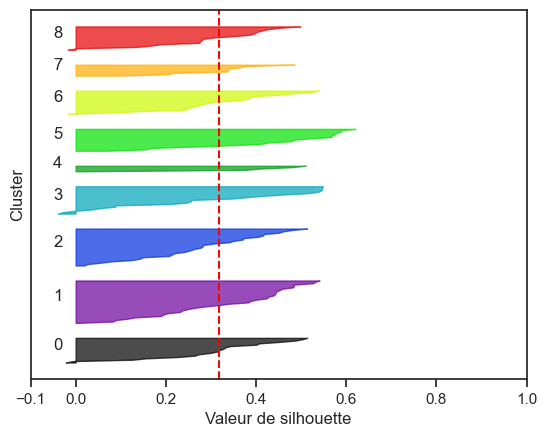

In [305]:
# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, labels)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, labels)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(labels))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


### Dendogramme

Score de silhouette moyen : 0.2993195163227867


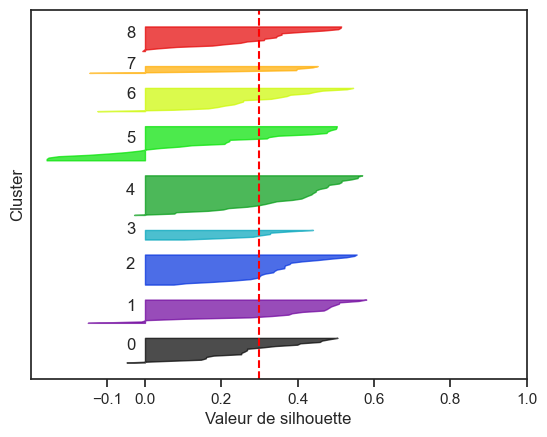

In [306]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Réorganiser les numéros de cluster pour qu'ils soient continus de 0 à 1
clusters = clusters - 1

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, clusters)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, clusters)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(clusters))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

Après le feature enginering nosu obtenons des scores de siloheutte plus faible. Après plusieurs itérations différentes j'ai réussi à monter jusqu'à 0.60 mais je n'avais pas assez de matière afin de fournir un analyse métier intéressante.

Nous allons garder notre clustering Kmeans car le score est légèrement plus élevé.

## ARI

In [307]:
# Importer la fonction adjusted_rand_score du module sklearn.metrics
from sklearn.metrics import adjusted_rand_score

# Obtenir les labels attribués par KMeans et le dendrogramme
labels_kmeans = kmeans.labels_
labels_dendrogramme = clusters

# Calculer l'Indice de Rand Ajusté (ARI) en comparant les deux ensembles de labels
ari = adjusted_rand_score(labels_kmeans, labels_dendrogramme)

# Afficher le résultat
print("Indice de Rand :", ari)

Indice de Rand : 0.8114925974198591


Nos deux clustering sont relativement proche au vu du résulat de notre ari plus proche de 1 que de 0.

# Etude des clusters

### Fonctions pour l'étude des clusters

In [308]:
from math import pi

def get_cluster_data(data, cluster_column, cluster_value):
    """Renvoie un sous-ensemble de données pour le cluster spécifié."""
    return data[data[cluster_column] == cluster_value]

def radar_plot(*cluster_data_list):
    """Crée un radar plot pour les variables numériques de plusieurs clusters."""
    for i, cluster_data in enumerate(cluster_data_list):
        numeric_columns = cluster_data.select_dtypes(include='number').columns
        stats = cluster_data[numeric_columns].mean().tolist()
        stats += stats[:1]  # repeat the first value to close the circular graph
        angles = [n / float(len(numeric_columns)) * 2 * pi for n in range(len(numeric_columns))]
        angles += angles[:1]
        plt.polar(angles, stats, label=f'Cluster {i+1}')  # Ajoutez un label à chaque plot
        plt.fill(angles, stats, alpha=0.1)
    plt.xticks(angles[:-1], numeric_columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Ajoutez une légende à droite du graphique
    plt.show() 

def plot_boxplot(data):
    """Crée un boxplot pour toutes les colonnes numériques côte à côte."""
    numeric_columns = data.select_dtypes(include='number').columns
    sns.boxplot(data=data[numeric_columns])
    plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.show()
    
def radar_plot_subplot(cluster_data_list, ax):
    """Crée un radar plot pour les variables numériques de plusieurs clusters."""
    max_val = None
    for cluster_data in cluster_data_list:
        numeric_columns = cluster_data.select_dtypes(include='number').columns
        stats = cluster_data[numeric_columns].mean().tolist()
        if max_val is None or max(stats) > max_val:
            max_val = max(stats)  # Mettre à jour la valeur maximale
        stats += stats[:1]  # repeat the first value to close the circular graph
        angles = [n / float(len(numeric_columns)) * 2 * pi for n in range(len(numeric_columns))]
        angles += angles[:1]
        ax.plot(angles, stats)  # Utilisez plot au lieu de polar
        ax.fill(angles, stats, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(numeric_columns)
    ax.set_ylim(0, max_val)  # Définir les limites de l'axe y

def plot_boxplot_subplot(data, ax):
    """Crée un boxplot pour toutes les colonnes numériques côte à côte."""
    numeric_columns = data.select_dtypes(include='number').columns
    sns.boxplot(data=data[numeric_columns], ax=ax)
    ax.set_xticklabels(numeric_columns, rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité

def plot_subplots(cluster_data_list, data):
    """Crée un subplot avec un radar plot et un boxplot."""
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, polar=True)
    ax2 = fig.add_subplot(122)
    radar_plot_subplot(cluster_data_list, ax1)
    plot_boxplot_subplot(data, ax2)
    plt.show()
    
def descriptive_statistics(cluster_data):
    """Affiche les statistiques descriptives pour les colonnes numériques du cluster."""
    numeric_columns = cluster_data.select_dtypes(include='number')
    print(numeric_columns.describe())
    
def analyze_cluster(data, cluster_column, cluster_value):
    """Analyse un cluster spécifié en appelant toutes les fonctions."""
    cluster_data = get_cluster_data(data, cluster_column, cluster_value)
    print('Boxplot et radarplot pour le cluster', cluster_value)
    plot_subplots([cluster_data], data)
    # print("Boxplot des colonnes numériques :")
    # plot_boxplot(cluster_data)
    # print("Radar plot des colonnes numériques :")
    # radar_plot(cluster_data)
    # print("Statistiques descriptives des colonnes numériques :")
    # descriptive_statistics(cluster_data)    

Création des datframes à partir des clusters

In [309]:
from scipy import cluster
# Créez des DataFrames pour chaque cluster Kmeans
cluster_kmeans_dfs = []
for i in range(nb_clusters):
    cluster_kmeans_df = get_cluster_data(data_reconstructed, 'cluster_kmeans', str(i))
    cluster_kmeans_dfs.append(cluster_kmeans_df)

# Créez des DataFrames pour chaque cluster dendogramme
cluster_dd_dfs = []
for i in range(nb_clusters):
    cluster_dd_df = get_cluster_data(data_reconstructed, 'cluster_dd', str(i))
    cluster_dd_dfs.append(cluster_dd_df)

### Etude global des clusters

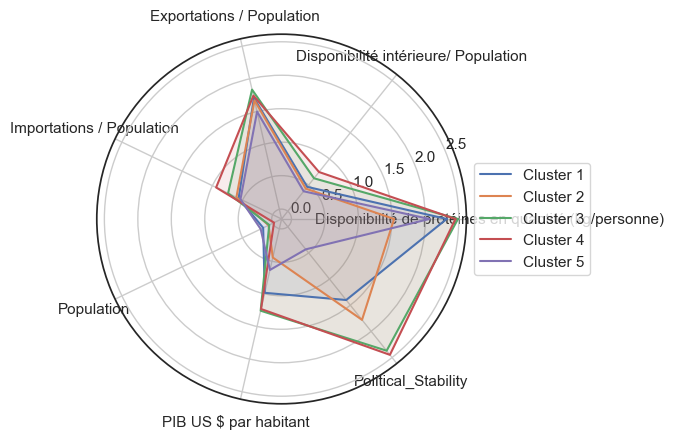

(None,
                  Pays cluster_kmeans cluster_dd  \
 10          Australie              5          2   
 15            Barbade              5          2   
 16           Belgique              5          2   
 29             Canada              5          2   
 30              Chili              5          1   
 39           Danemark              5          2   
 47           Finlande              5          2   
 48             France              5          3   
 62            Hongrie              5          2   
 66            Irlande              5          2   
 67            Islande              5          2   
 82           Lituanie              5          2   
 92            Maurice              5          2   
 105  Nouvelle-Zélande              5          2   
 114           Pologne              5          2   
 116          Portugal              5          2   
 136          Slovénie              5          2   
 
      Disponibilité de protéines en quantité (kg/person

In [310]:
radar_plot(cluster_kmeans_dfs[0], cluster_kmeans_dfs[1], cluster_kmeans_dfs[2], cluster_kmeans_dfs[3], cluster_kmeans_dfs[4]), cluster_kmeans_dfs[5], cluster_kmeans_dfs[6], cluster_kmeans_dfs[7], cluster_kmeans_dfs[8]

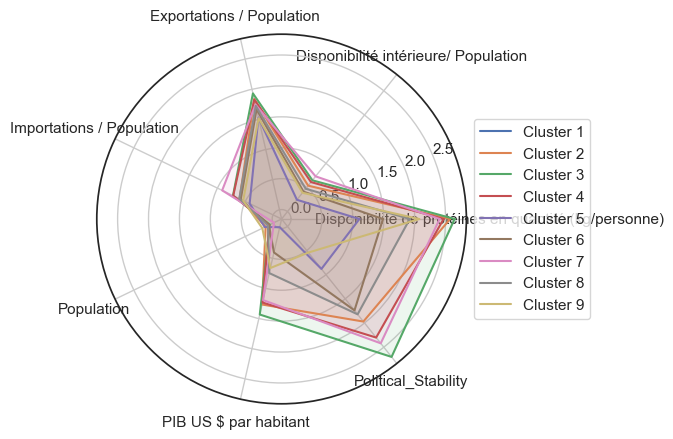

In [311]:
radar_plot(cluster_dd_dfs[0], cluster_dd_dfs[1], cluster_dd_dfs[2], cluster_dd_dfs[3], cluster_dd_dfs[4], cluster_dd_dfs[5], cluster_dd_dfs[6], cluster_dd_dfs[7], cluster_dd_dfs[8])

### Création de la comparaison de le moyenne des valeurs par cluster par rapprot au global

In [312]:
# Calculer la moyenne de chaque variable pour chaque cluster
data_reconstructed_mean = data_reconstructed_num.groupby('cluster_kmeans').mean()
data_reconstructed_mean.drop(['cluster_dd'], axis=1, inplace=True)
data_reconstructed_mean

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
cluster_kmeans,,,,,,,
0,2.319395,0.466507,1.709213,0.564600,0.157789,0.983771,1.400789
1,1.533437,0.432789,1.670674,0.601551,0.068695,0.443109,1.780074
2,2.487931,0.629982,1.834983,0.739279,0.057345,1.257978,2.369783
3,2.450239,0.749920,1.743388,0.937930,-0.022108,1.231687,2.448449
4,2.060461,0.381789,1.497846,0.534112,0.198860,0.633393,0.432354
5,2.646021,0.632846,1.931596,0.699487,0.069230,1.425344,2.650603
6,1.911256,0.467672,1.719858,0.600586,0.095600,0.733254,1.792673
7,1.131316,0.252066,1.537496,0.426539,0.147257,0.007361,0.914817
8,2.572691,0.534323,1.833283,0.598424,0.136156,1.262616,1.948824


In [313]:
# Calculer la moyenne de chaque variable pour l'ensemble du jeu de données
data_reconstructed_num.drop(['cluster_dd', 'cluster_kmeans'], axis=1, inplace=True)
overall_means = data_reconstructed_num.mean()
overall_means

Disponibilité de protéines en quantité (kg/personne)    2.158282
Disponibilité intérieure/ Population                    0.533368
Exportations / Population                               1.748788
Importations / Population                               0.660816
Population                                              0.083867
PIB US $ par habitant                                   0.942214
Political_Stability                                     1.941024
dtype: float64

In [314]:
# Comparer les moyennes de chaque cluster à la moyenne générale
dif = data_reconstructed_mean - overall_means
dif

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
cluster_kmeans,,,,,,,
0,0.161113,-0.066861,-0.039575,-0.096215,0.073922,0.041558,-0.540235
1,-0.624846,-0.100580,-0.078115,-0.059265,-0.015172,-0.499104,-0.160950
2,0.329648,0.096614,0.086194,0.078463,-0.026522,0.315765,0.428759
3,0.291957,0.216551,-0.005400,0.277114,-0.105974,0.289473,0.507425
4,-0.097821,-0.151579,-0.250943,-0.126703,0.114993,-0.308821,-1.508670
5,0.487738,0.099478,0.182808,0.038671,-0.014637,0.483130,0.709579
6,-0.247026,-0.065696,-0.028930,-0.060230,0.011733,-0.208959,-0.148351
7,-1.026966,-0.281303,-0.211292,-0.234277,0.063391,-0.934853,-1.026207
8,0.414409,0.000955,0.084495,-0.062392,0.052289,0.320402,0.007800


In [315]:
dif['cluster_kmeans'] = dif.index
dif.reset_index(drop=True, inplace=True)
dif.head(10)

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
0,0.161113,-0.066861,-0.039575,-0.096215,0.073922,0.041558,-0.540235,0
1,-0.624846,-0.100580,-0.078115,-0.059265,-0.015172,-0.499104,-0.160950,1
2,0.329648,0.096614,0.086194,0.078463,-0.026522,0.315765,0.428759,2
3,0.291957,0.216551,-0.005400,0.277114,-0.105974,0.289473,0.507425,3
4,-0.097821,-0.151579,-0.250943,-0.126703,0.114993,-0.308821,-1.508670,4
5,0.487738,0.099478,0.182808,0.038671,-0.014637,0.483130,0.709579,5
6,-0.247026,-0.065696,-0.028930,-0.060230,0.011733,-0.208959,-0.148351,6
7,-1.026966,-0.281303,-0.211292,-0.234277,0.063391,-0.934853,-1.026207,7
8,0.414409,0.000955,0.084495,-0.062392,0.052289,0.320402,0.007800,8


Une valeur négative indique que la moyenne générale est plus importante et inversement.

## Kmeans

### CLuster Kmeans 1

Boxplot et radarplot pour le cluster 0


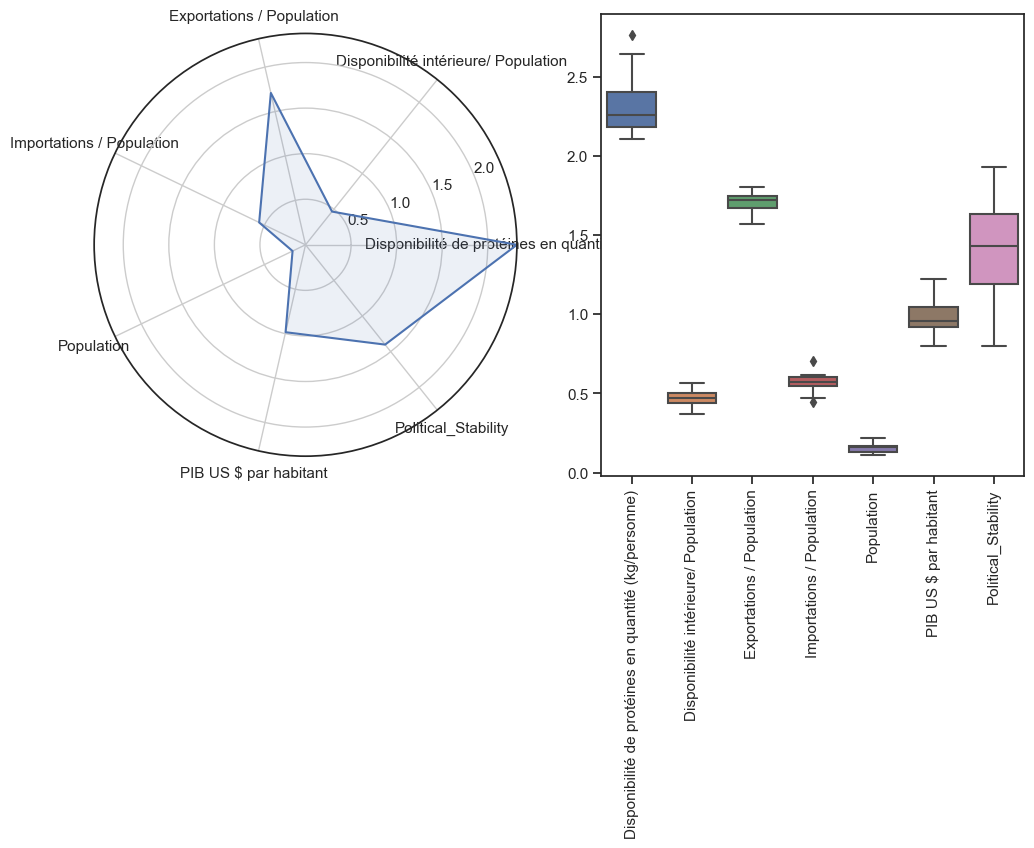

In [316]:
analyze_cluster(cluster_kmeans_dfs[0], 'cluster_kmeans', '0')

In [317]:
cluster_kmeans_dfs[0].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.319395,0.466507,1.709213,0.564600,0.157789,0.983771,1.400789
std,0.179100,0.050804,0.058684,0.061881,0.030896,0.119818,0.344326
min,2.111272,0.371042,1.571482,0.443722,0.112103,0.801263,0.800502
25%,2.187212,0.440057,1.674822,0.546137,0.129134,0.919472,1.189525
50%,2.257543,0.473969,1.721511,0.569420,0.162551,0.956649,1.429851
75%,2.404722,0.500369,1.747505,0.603253,0.169519,1.049064,1.635155
max,2.767563,0.565390,1.804295,0.703078,0.219093,1.224159,1.931910


In [318]:
cluster_kmeans_dfs[0].head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
19,Bosnie-Herzégovine,0,9,2.257543,0.499497,1.765647,0.599282,0.120291,0.999593,1.806655
33,Colombie,0,9,2.463815,0.482148,1.721511,0.569420,0.167119,1.091399,1.386705
42,El Salvador,0,9,2.249453,0.487332,1.769980,0.581730,0.127077,0.991340,1.787992
55,Guatemala,0,9,2.270451,0.501240,1.703486,0.619337,0.127111,0.966262,1.542421
61,Honduras,0,9,2.211898,0.456894,1.729428,0.554958,0.146552,0.924695,1.541199


In [319]:
cluster_1 = dif[dif['cluster_kmeans'] == 0]
cluster_1

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
0,0.161113,-0.066861,-0.039575,-0.096215,0.073922,0.041558,-0.540235,0


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, et exportations par habitant positives. Importations par habitant négatives. PIB par habitant et stabilité politique en dessous de la moyenne globale.

- Interprétation potentielle : Ce cluster représente des régions avec une forte disponibilité de protéines, des exportations significatives, mais une stabilité politique et un PIB par habitant relativement bas.

### Cluster Kmeans 2

Boxplot et radarplot pour le cluster 1


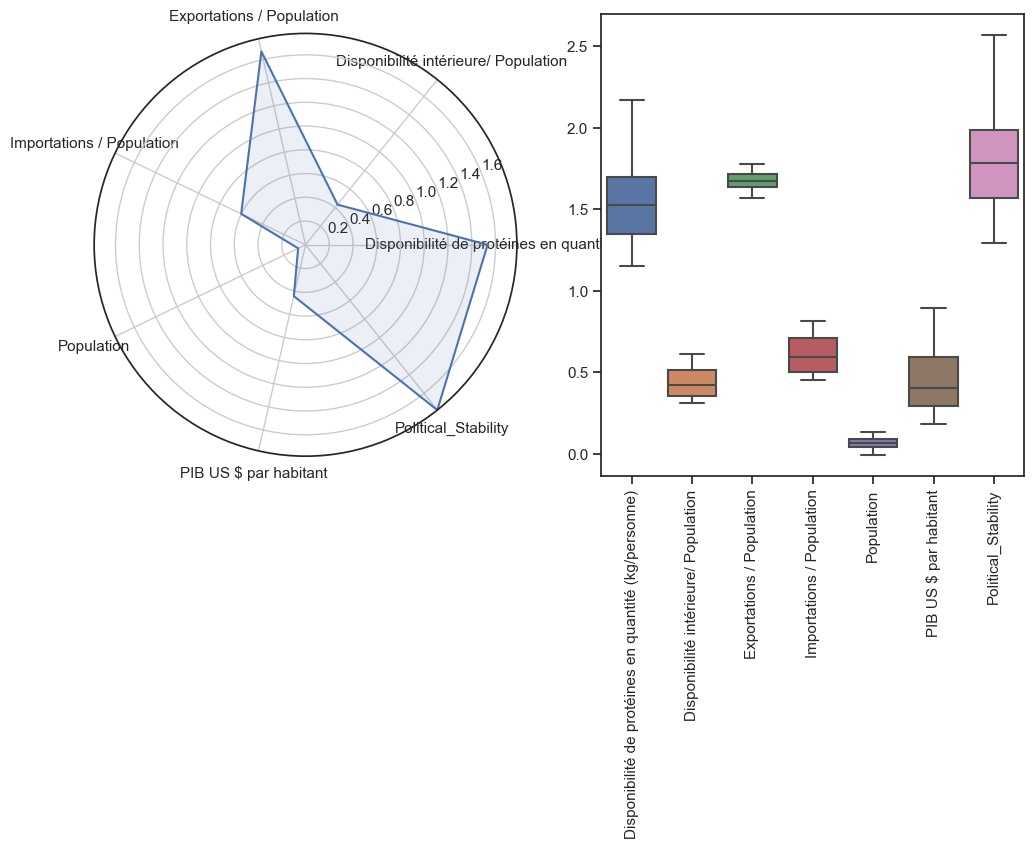

In [320]:
analyze_cluster(cluster_kmeans_dfs[1], 'cluster_kmeans', '1')

In [321]:
cluster_kmeans_dfs[1].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1.533437,0.432789,1.670674,0.601551,0.068695,0.443109,1.780074
std,0.252056,0.091309,0.049519,0.110350,0.034365,0.191746,0.279658
min,1.150044,0.309562,1.567500,0.453817,-0.007166,0.180084,1.291988
25%,1.349881,0.352784,1.637292,0.500202,0.043372,0.290639,1.569132
50%,1.522136,0.423748,1.669321,0.594248,0.066523,0.400264,1.784076
75%,1.698258,0.512942,1.716712,0.708435,0.090232,0.594351,1.986342
max,2.168992,0.612506,1.779338,0.813107,0.133540,0.892212,2.568781


In [322]:
cluster_kmeans_dfs[1].head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
5,Angola,1,6,2.019231,0.578051,1.644860,0.767455,0.042655,0.805702,1.783916
23,Burkina Faso,1,5,1.350611,0.317700,1.640336,0.466870,0.124195,0.249118,1.394964
25,Bénin,1,5,1.910781,0.560216,1.684766,0.740463,0.035022,0.755332,1.977928
27,Cambodge,1,5,1.363949,0.399195,1.736691,0.550273,0.060362,0.364017,2.078038
28,Cameroun,1,5,1.566118,0.353756,1.628160,0.501056,0.132332,0.395275,1.291988


In [323]:
cluster_2 = dif[dif['cluster_kmeans'] == 1]
cluster_2

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
1,-0.624846,-0.10058,-0.078115,-0.059265,-0.015172,-0.499104,-0.16095,1


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, et importations par habitant négatives. PIB par habitant en dessous de la moyenne globale. Stabilité politique négative.

- Interprétation potentielle : Ce cluster suggère des régions avec une faible disponibilité de protéines, des importations limitées, une stabilité politique négative, et un PIB par habitant relativement bas.

### Cluster Kmeans 3

Boxplot et radarplot pour le cluster 2


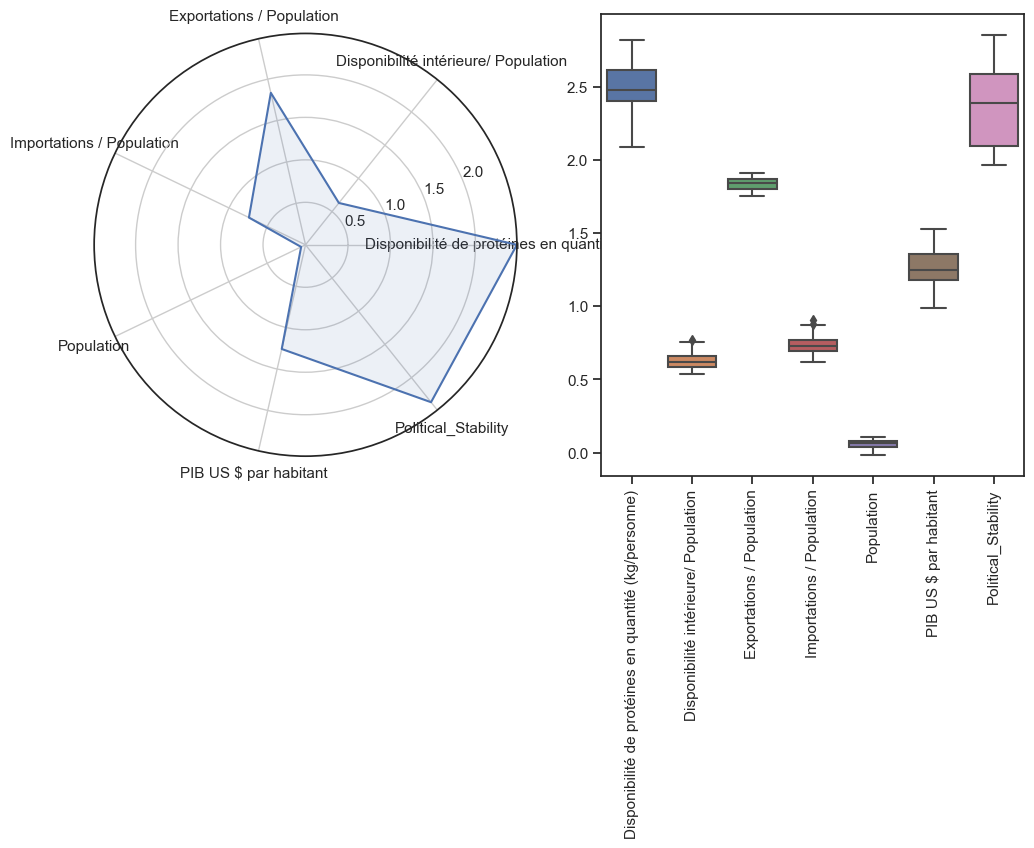

In [324]:
analyze_cluster(cluster_kmeans_dfs[2], 'cluster_kmeans', '2')

In [325]:
cluster_kmeans_dfs[2].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.487931,0.629982,1.834983,0.739279,0.057345,1.257978,2.369783
std,0.184725,0.060522,0.045704,0.072753,0.029654,0.134403,0.280524
min,2.087727,0.536311,1.752557,0.620420,-0.015199,0.984755,1.966010
25%,2.403365,0.586402,1.804390,0.695238,0.035568,1.180675,2.097902
50%,2.480142,0.616067,1.843292,0.726253,0.064420,1.246709,2.390674
75%,2.616565,0.659265,1.872680,0.767889,0.079766,1.359762,2.584610
max,2.815767,0.770123,1.909809,0.907612,0.103495,1.527883,2.854591


In [326]:
cluster_kmeans_dfs[2].head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
4,Allemagne,2,3,2.617696,0.625586,1.800572,0.731605,0.082953,1.314465,2.101184
7,Arabie saoudite,2,3,2.740320,0.658274,1.764871,0.776758,0.082001,1.384105,1.966010
11,Autriche,2,2,2.575218,0.688810,1.909809,0.790738,0.022228,1.393672,2.819573
13,Bahamas,2,2,2.783864,0.753157,1.865715,0.874715,0.012939,1.527883,2.690375
22,Bulgarie,2,3,2.407147,0.600335,1.823614,0.708762,0.067011,1.184260,2.284070


In [327]:
cluster_3 = dif[dif['cluster_kmeans'] == 2]
cluster_3

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
2,0.329648,0.096614,0.086194,0.078463,-0.026522,0.315765,0.428759,2


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, exportations et PIB par habitant positives. Stabilité politique au-dessus de la moyenne globale.

- Interprétation potentielle : Ce cluster indique des régions avec une bonne disponibilité de protéines, des exportations significatives, un PIB par habitant élevé, et une stabilité politique positive.

### Cluster Kmeans 4

Boxplot et radarplot pour le cluster 3


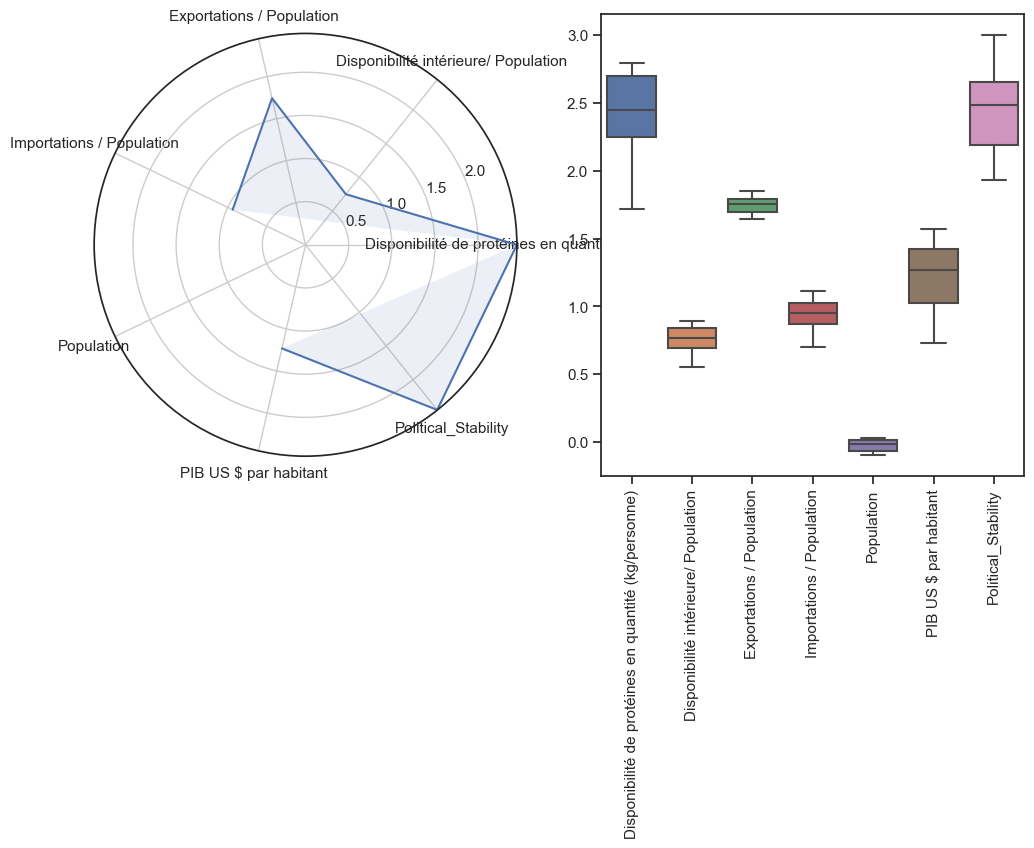

In [328]:
analyze_cluster(cluster_kmeans_dfs[3], 'cluster_kmeans', '3')

In [329]:
cluster_kmeans_dfs[3].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.450239,0.749920,1.743388,0.937930,-0.022108,1.231687,2.448449
std,0.303462,0.101910,0.057981,0.122296,0.038422,0.230175,0.315105
min,1.715410,0.551181,1.644619,0.701152,-0.093967,0.727805,1.934694
25%,2.252771,0.691608,1.693482,0.869936,-0.063051,1.025053,2.192991
50%,2.448989,0.766507,1.752742,0.948476,-0.014047,1.268722,2.486259
75%,2.696755,0.838589,1.789857,1.025568,0.011620,1.421541,2.651583
max,2.794317,0.889520,1.853594,1.113737,0.030942,1.572902,3.003273


In [330]:
cluster_kmeans_dfs[3].head(11)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
2,Albanie,3,6,2.209980,0.619541,1.759058,0.773268,0.030942,1.025053,2.249046
6,Antigua-et-Barbuda,3,6,2.696755,0.867240,1.706860,1.090094,-0.063155,1.421530,2.508713
20,Botswana,3,6,1.715410,0.551181,1.832439,0.701152,-0.002146,0.727805,2.726658
26,Cabo Verde,3,6,2.148247,0.673910,1.759861,0.854622,-0.015840,1.013723,2.499021
31,Chine - RAS de Macao,3,6,2.787191,0.855446,1.853594,1.020899,-0.056072,1.572902,3.003273
37,Cuba,3,6,2.305289,0.694761,1.757679,0.869936,-0.006820,1.122078,2.432510
41,Dominique,3,6,2.432196,0.816338,1.765727,1.025568,-0.072877,1.268722,2.794784
50,Gabon,3,6,2.448989,0.707343,1.656636,0.904848,0.015670,1.150457,1.934694
83,Luxembourg,3,6,2.647791,0.889520,1.789948,1.100569,-0.093967,1.458321,2.976709
84,Macédoine du Nord,3,6,2.267143,0.691608,1.644619,0.903257,0.000845,1.019281,1.981083


In [331]:
cluster_4 = dif[dif['cluster_kmeans'] == 3]
cluster_4

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
3,0.291957,0.216551,-0.0054,0.277114,-0.105974,0.289473,0.507425,3


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, importations, et PIB par habitant positives. Stabilité politique au-dessus de la moyenne globale.

- Interprétation potentielle : Des régions prospères avec une disponibilité de protéines, des importations et exportations significatives, un PIB par habitant élevé, et une stabilité politique positive.

### Cluster Kmeans 5

Boxplot et radarplot pour le cluster 4


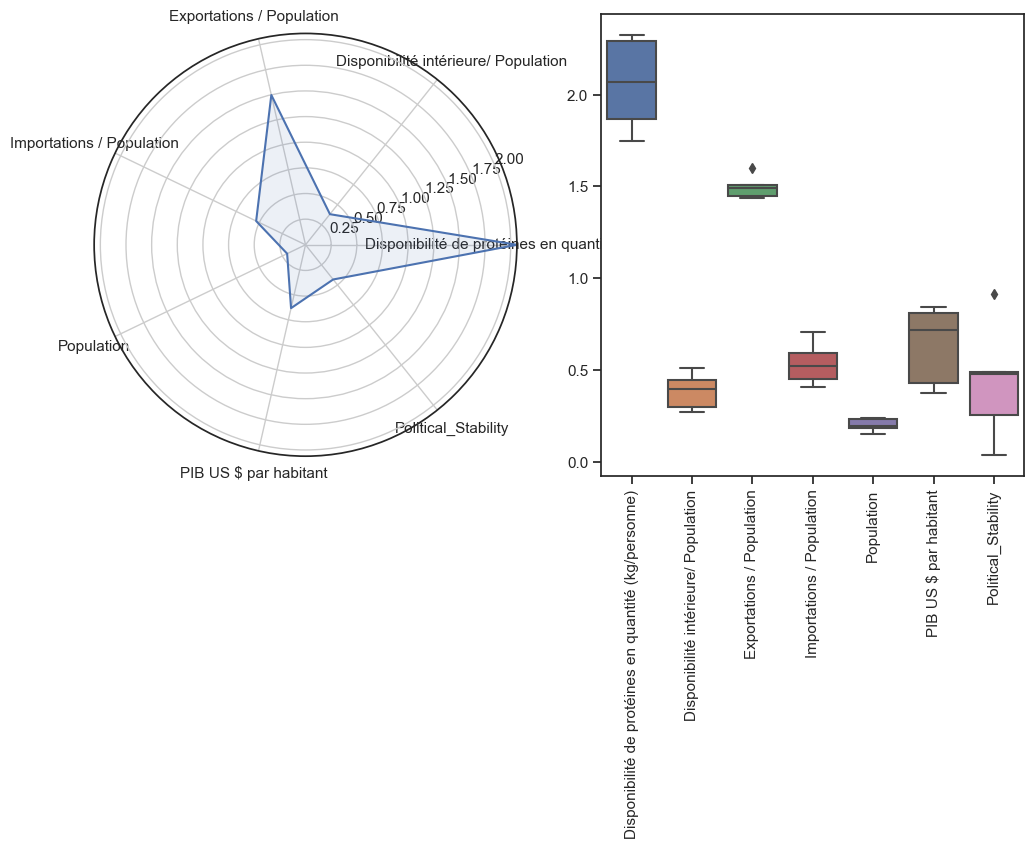

In [332]:
analyze_cluster(cluster_kmeans_dfs[4], 'cluster_kmeans', '4')

In [333]:
cluster_kmeans_dfs[4].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.060461,0.381789,1.497846,0.534112,0.198860,0.633393,0.432354
std,0.254585,0.100720,0.065422,0.118751,0.036240,0.218562,0.325338
min,1.745933,0.267247,1.438887,0.405641,0.150097,0.371358,0.036595
25%,1.869486,0.295192,1.448285,0.448625,0.180397,0.428987,0.252191
50%,2.069651,0.395553,1.489589,0.520783,0.195187,0.717511,0.475516
75%,2.291203,0.442199,1.509858,0.590372,0.232339,0.809192,0.485995
max,2.326034,0.508756,1.602608,0.705142,0.236279,0.839915,0.911473


In [334]:
cluster_kmeans_dfs[4].head(5)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
65,Iraq,4,8,2.291203,0.508756,1.448285,0.705142,0.150097,0.809192,0.485995
80,Liban,4,8,2.326034,0.442199,1.509858,0.590372,0.195187,0.839915,0.475516
110,Pakistan,4,8,1.745933,0.267247,1.489589,0.405641,0.232339,0.371358,0.252191
158,Yémen,4,8,1.869486,0.295192,1.438887,0.448625,0.236279,0.428987,0.036595
161,Égypte,4,8,2.069651,0.395553,1.602608,0.520783,0.180397,0.717511,0.911473


In [335]:
cluster_5 = dif[dif['cluster_kmeans'] == 4]
cluster_5

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
4,-0.097821,-0.151579,-0.250943,-0.126703,0.114993,-0.308821,-1.50867,4


- Caractéristiques distinctives : Importations et stabilité politique négatives. Toutes les autres variables proches de la moyenne globale.

- Interprétation potentielle : Ce cluster pourrait représenter des régions avec des importations importantes, une stabilité politique négative, et des autres caractéristiques relativement équilibrées.

### Cluster Kmeans 6

Boxplot et radarplot pour le cluster 5


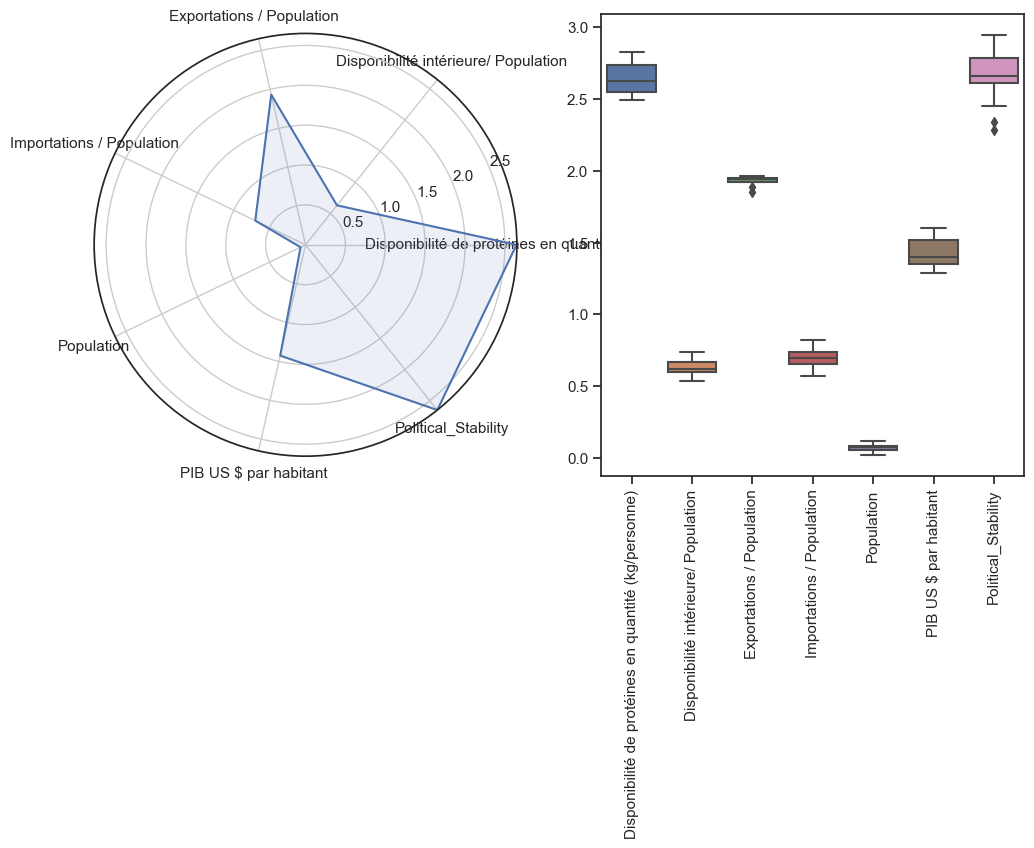

In [336]:
analyze_cluster(cluster_kmeans_dfs[5], 'cluster_kmeans', '5')

In [337]:
cluster_kmeans_dfs[5].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.646021,0.632846,1.931596,0.699487,0.069230,1.425344,2.650603
std,0.114306,0.055920,0.027079,0.069742,0.026234,0.099716,0.172741
min,2.489798,0.534319,1.852731,0.567843,0.021855,1.289342,2.280612
25%,2.546416,0.597109,1.923568,0.657138,0.054057,1.347611,2.614564
50%,2.623982,0.622754,1.940400,0.695516,0.076197,1.399866,2.656495
75%,2.737476,0.666486,1.948910,0.736674,0.085036,1.515074,2.782384
max,2.825387,0.736746,1.961691,0.822991,0.119549,1.601197,2.946783


In [338]:
cluster_kmeans_dfs[5].head(17)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
10,Australie,5,2,2.825387,0.654638,1.940400,0.710735,0.079818,1.555788,2.614564
15,Barbade,5,2,2.725492,0.637971,1.944185,0.695516,0.076197,1.486795,2.654698
16,Belgique,5,2,2.489798,0.566415,1.925912,0.622835,0.092607,1.289342,2.520340
29,Canada,5,2,2.737476,0.669761,1.951209,0.736674,0.055307,1.515074,2.787802
30,Chili,5,1,2.596202,0.589102,1.884858,0.657138,0.096697,1.340062,2.340638
39,Danemark,5,2,2.793773,0.701289,1.923568,0.783876,0.044559,1.547643,2.737921
47,Finlande,5,2,2.588699,0.666486,1.922761,0.754408,0.038375,1.399866,2.782384
48,France,5,3,2.631438,0.618084,1.852731,0.704082,0.085036,1.354967,2.280612
62,Hongrie,5,2,2.506276,0.566575,1.961691,0.610716,0.091412,1.324243,2.656495
66,Irlande,5,2,2.777223,0.724518,1.920566,0.818741,0.026354,1.546742,2.822489


In [339]:
cluster_6 = dif[dif['cluster_kmeans'] == 5]
cluster_6

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
5,0.487738,0.099478,0.182808,0.038671,-0.014637,0.48313,0.709579,5


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, exportations, et PIB par habitant positives. Stabilité politique au-dessus de la moyenne globale.

- Interprétation potentielle : Ce cluster suggère des régions avec une forte disponibilité de protéines, des exportations significatives, un PIB par habitant élevé, et une stabilité politique positive.

### Cluster Kmeans 7

Boxplot et radarplot pour le cluster 6


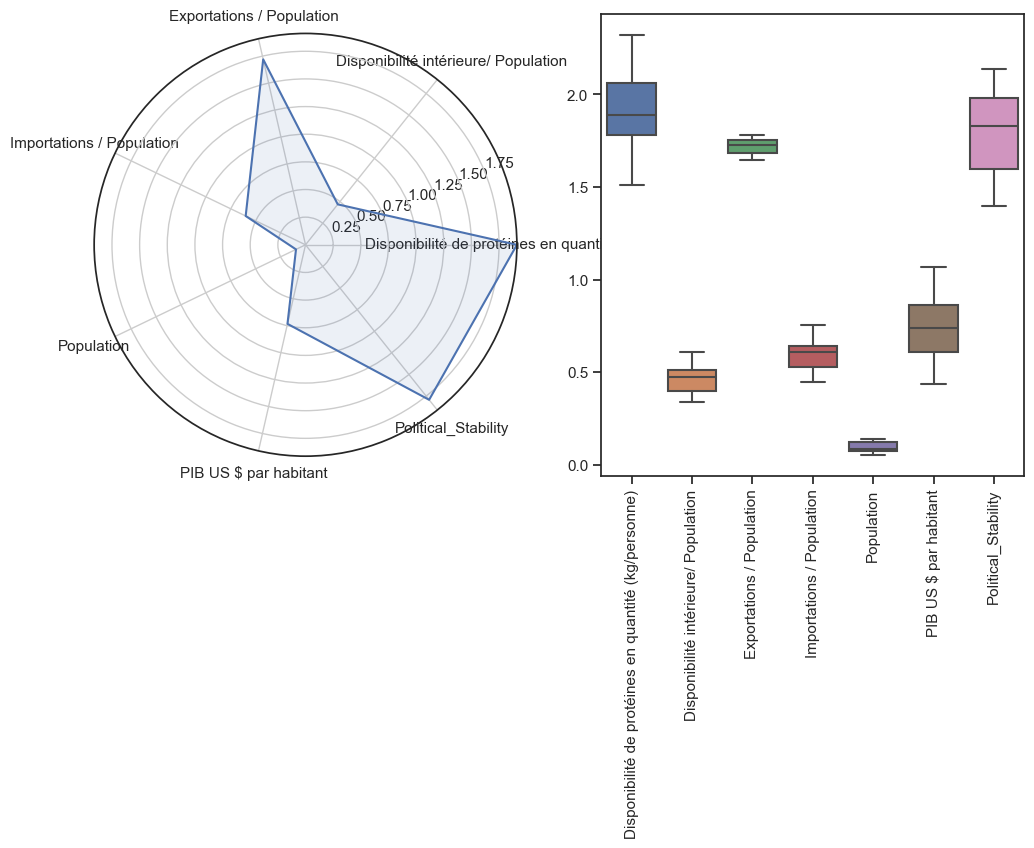

In [340]:
analyze_cluster(cluster_kmeans_dfs[6], 'cluster_kmeans', '6')

In [341]:
cluster_kmeans_dfs[6].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.911256,0.467672,1.719858,0.600586,0.095600,0.733254,1.792673
std,0.219878,0.074687,0.041918,0.086620,0.027672,0.174612,0.237161
min,1.513698,0.340330,1.646069,0.449999,0.055121,0.439040,1.398195
25%,1.782314,0.398791,1.683990,0.528362,0.078130,0.610400,1.595228
50%,1.889366,0.472770,1.725755,0.608304,0.085284,0.739023,1.827762
75%,2.061278,0.510104,1.753677,0.644962,0.122177,0.866144,1.983305
max,2.321675,0.608855,1.779994,0.757325,0.142670,1.069544,2.134579


In [342]:
cluster_kmeans_dfs[6].head(18)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
3,Algérie,6,7,1.834476,0.395235,1.672060,0.520978,0.139017,0.615827,1.398195
9,Arménie,6,7,2.208589,0.569631,1.646069,0.737897,0.076349,0.922178,1.599556
12,Azerbaïdjan,6,9,2.151989,0.478963,1.691324,0.602820,0.126192,0.871838,1.511470
45,Eswatini,6,7,1.919990,0.485668,1.721092,0.624535,0.084333,0.748627,1.854925
59,Géorgie,6,7,2.196401,0.559517,1.693630,0.710507,0.076857,0.941825,1.772232
63,Indonésie,6,7,1.780915,0.370319,1.729469,0.473748,0.142670,0.608591,1.593786
81,Libéria,6,7,1.786512,0.466577,1.678888,0.622940,0.081947,0.625813,1.722546
87,Malawi,6,7,1.513698,0.340330,1.750891,0.449999,0.121785,0.439040,1.800599
96,Monténégro,6,7,2.321675,0.608855,1.728447,0.757325,0.057851,1.069544,1.988987
112,Paraguay,6,7,1.858741,0.464912,1.765024,0.587900,0.085300,0.729419,2.015594


In [343]:
cluster_7 = dif[dif['cluster_kmeans'] == 6]
cluster_7

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
6,-0.247026,-0.065696,-0.02893,-0.06023,0.011733,-0.208959,-0.148351,6


- Caractéristiques distinctives : Importations et stabilité politique négatives. Disponibilité de protéines, disponibilité intérieure, et exportations par habitant positives.

- Interprétation potentielle : Ce cluster pourrait représenter des régions avec des importations importantes, une stabilité politique négative, mais également une bonne disponibilité de protéines et des exportations positives.

### Cluster Kmeans 8

Boxplot et radarplot pour le cluster 7


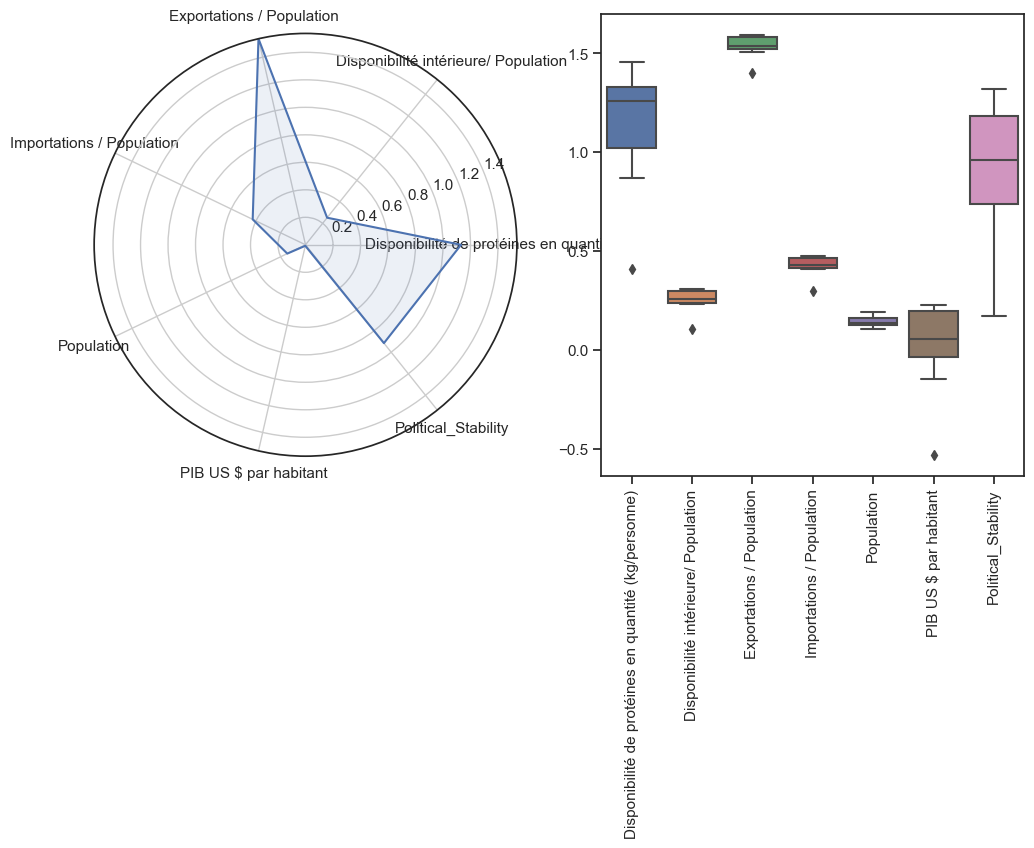

In [344]:
analyze_cluster(cluster_kmeans_dfs[7], 'cluster_kmeans', '7')

In [345]:
cluster_kmeans_dfs[7].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.131316,0.252066,1.537496,0.426539,0.147257,0.007361,0.914817
std,0.331375,0.059838,0.060295,0.053294,0.028523,0.235674,0.362529
min,0.411568,0.110322,1.402897,0.298551,0.108157,-0.527392,0.173446
25%,1.020172,0.238029,1.520918,0.416606,0.130658,-0.033692,0.739847
50%,1.257928,0.260986,1.538936,0.433553,0.140008,0.057671,0.962106
75%,1.327931,0.297457,1.585298,0.468875,0.163785,0.198077,1.184445
max,1.457655,0.307625,1.593917,0.474708,0.192866,0.226775,1.320357


In [346]:
cluster_kmeans_dfs[7].head(18)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
0,Afghanistan,7,4,1.284617,0.238029,1.402897,0.433553,0.192866,0.005625,0.173446
14,Bangladesh,7,5,1.327931,0.307625,1.593917,0.468937,0.132373,0.198077,1.184079
74,Kenya,7,4,1.115663,0.297457,1.592521,0.474708,0.108157,0.057671,1.320357
89,Mali,7,4,1.437934,0.273535,1.538936,0.427847,0.177606,0.213176,0.739847
101,Niger,7,4,1.020172,0.245504,1.585298,0.413146,0.130658,-0.033692,1.184445
102,Nigéria,7,4,1.257928,0.260986,1.506801,0.436624,0.162830,0.071046,0.712079
137,Soudan,7,4,1.457655,0.300315,1.520918,0.468875,0.163785,0.226775,0.743913
144,Tchad,7,4,0.868377,0.234819,1.570750,0.416606,0.117034,-0.145043,1.213079
165,Éthiopie,7,4,0.411568,0.110322,1.525426,0.298551,0.140008,-0.527392,0.962106


In [347]:
cluster_8 = dif[dif['cluster_kmeans'] == 7]
cluster_8

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
7,-1.026966,-0.281303,-0.211292,-0.234277,0.063391,-0.934853,-1.026207,7


- Caractéristiques distinctives : Importations et stabilité politique négatives. Toutes les autres variables proches de la moyenne globale.

- Interprétation potentielle : Similaire au Cluster 4, ce cluster pourrait indiquer des régions avec des importations importantes, une stabilité politique négative, et des autres caractéristiques relativement équilibrées.

### Cluster Kmeans 9

Boxplot et radarplot pour le cluster 8


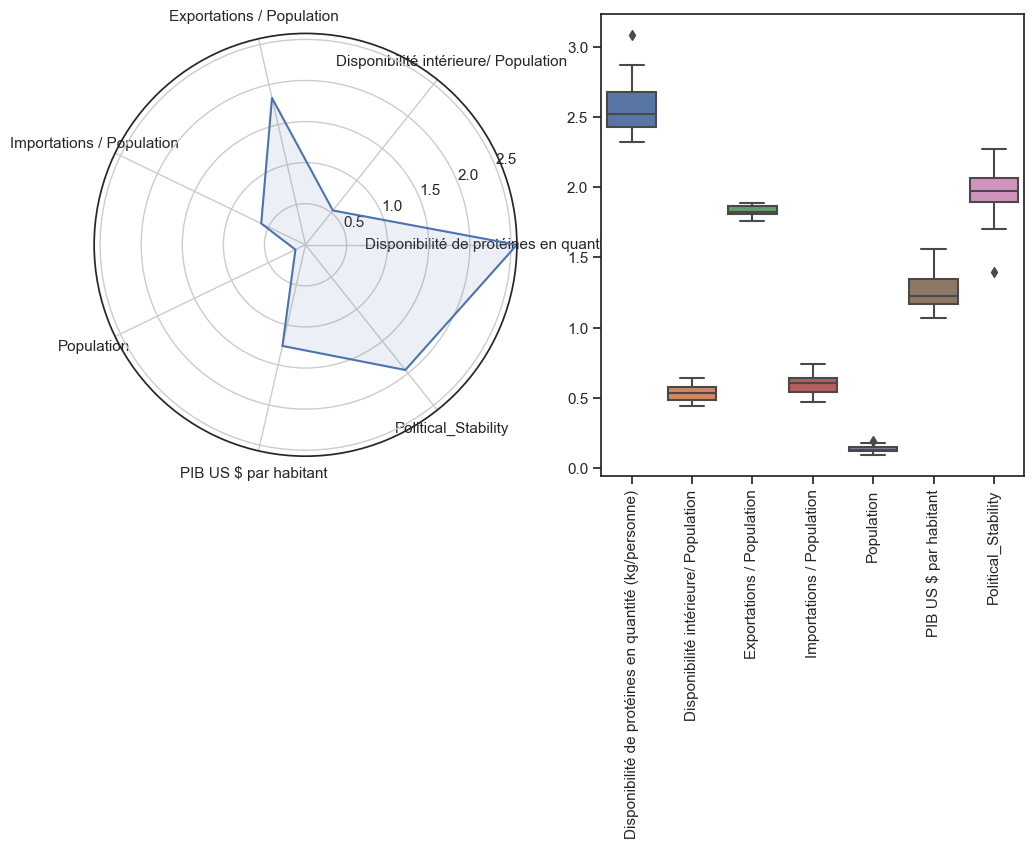

In [348]:
analyze_cluster(cluster_kmeans_dfs[8], 'cluster_kmeans', '8')

In [349]:
cluster_kmeans_dfs[8].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.572691,0.534323,1.833283,0.598424,0.136156,1.262616,1.948824
std,0.200026,0.059034,0.035644,0.070951,0.026184,0.147994,0.205376
min,2.324179,0.440901,1.756196,0.468370,0.093788,1.065930,1.394805
25%,2.430108,0.487083,1.808208,0.543790,0.119942,1.165904,1.894088
50%,2.522597,0.533858,1.821243,0.605659,0.130784,1.225445,1.968717
75%,2.679219,0.573874,1.866854,0.641001,0.146116,1.345615,2.065644
max,3.084086,0.642907,1.886187,0.737872,0.189639,1.561452,2.272631


In [350]:
cluster_kmeans_dfs[8].head(22)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability
1,Afrique du Sud,8,1,2.532535,0.560061,1.807047,0.645997,0.115013,1.232189,1.965190
8,Argentine,8,1,2.566825,0.534468,1.876970,0.585946,0.130890,1.288755,2.136737
17,Belize,8,1,2.414626,0.484997,1.863509,0.534959,0.143906,1.158485,2.031351
18,Bolivie (État plurinational de),8,1,2.360405,0.445119,1.807352,0.501265,0.168977,1.065930,1.699593
21,Brésil,8,1,2.509630,0.440901,1.851189,0.468370,0.189639,1.188163,1.742076
24,Bélarus,8,1,2.390377,0.479586,1.868674,0.528074,0.143552,1.143948,2.053940
43,Espagne,8,1,2.709783,0.591482,1.796266,0.676810,0.120560,1.352759,1.883617
49,Fédération de Russie,8,1,2.476553,0.533249,1.814718,0.611394,0.124513,1.188566,1.948288
58,Guyana,8,1,2.512659,0.530213,1.827625,0.599924,0.130679,1.218701,1.960957
64,Iran (République islamique d'),8,1,2.324179,0.493341,1.812798,0.570283,0.129757,1.070837,1.925500


In [351]:
cluster_9 = dif[dif['cluster_kmeans'] == 8]
cluster_9

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,Political_Stability,cluster_kmeans
8,0.414409,0.000955,0.084495,-0.062392,0.052289,0.320402,0.0078,8


- Caractéristiques distinctives : Disponibilité de protéines, disponibilité intérieure, exportations, et PIB par habitant positives. Importations et stabilité politique proches de la moyenne globale.

- Interprétation potentielle : Ce cluster représente des régions avec une forte disponibilité de protéines, des exportations significatives, un PIB par habitant élevé, et des importations et une stabilité politique relativement équilibrées.

# Sélection des pays

Pour sélectionner notre cluster le plus pertinent on va prendre en compte le PIB par habitant car on a besoin que nos poulets se vendent. On va aussi regadrer la disponibilité alimentaire (avec ou sans protéine) pour avoir une idée de l'état du marché.

9 ?

In [353]:
df_test

,F1,F2,F3
0,2.266964,-1.071002,0.457815
1,-0.879198,-0.321601,0.030163
2,0.109542,0.507469,0.065912
3,0.537434,-0.521401,-0.032069
4,-0.821921,-0.024524,0.155151
...,...,...,...
162,-0.397141,0.536815,0.654691
163,-0.650998,0.102190,-0.415731
164,-1.753927,-0.642631,-0.000145
165,3.026593,-0.423019,-0.559473


In [355]:
from sklearn.cluster import DBSCAN

# Assuming that 'df' is your DataFrame and it's already preprocessed
X = df_test.values

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

# Get labels
labels = db.labels_

# Add labels to the dataframe
df['Cluster_dbscan'] = labels

import plotly.graph_objects as go

fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='Cluster_dbscan', color_continuous_scale='Viridis')

fig.update_layout(title='Graphique des clusters en 3D')
fig.show()

In [ ]:
df.head()

,F1,F2,F3,cluster_kmeans,cluster_dd,Cluster,Cluster_dbscan
0,2.266964,-1.071002,0.457815,7,4,-1,-1
1,-0.879198,-0.321601,0.030163,8,1,0,0
2,0.109542,0.507469,0.065912,3,6,-1,-1
3,0.537434,-0.521401,-0.032069,6,7,-1,-1
4,-0.821921,-0.024524,0.155151,2,3,0,0


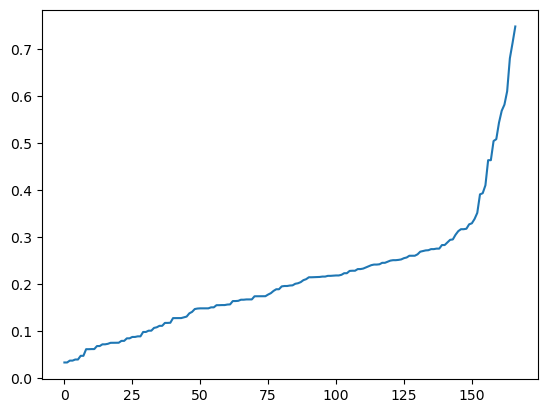

In [ ]:
# from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming `X` is your data and `min_samples` is the min_samples you chose
# min_samples = 5  # Define the value of min_samples
# neigh = NearestNeighbors(n_neighbors=min_samples)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

c:\Users\antoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



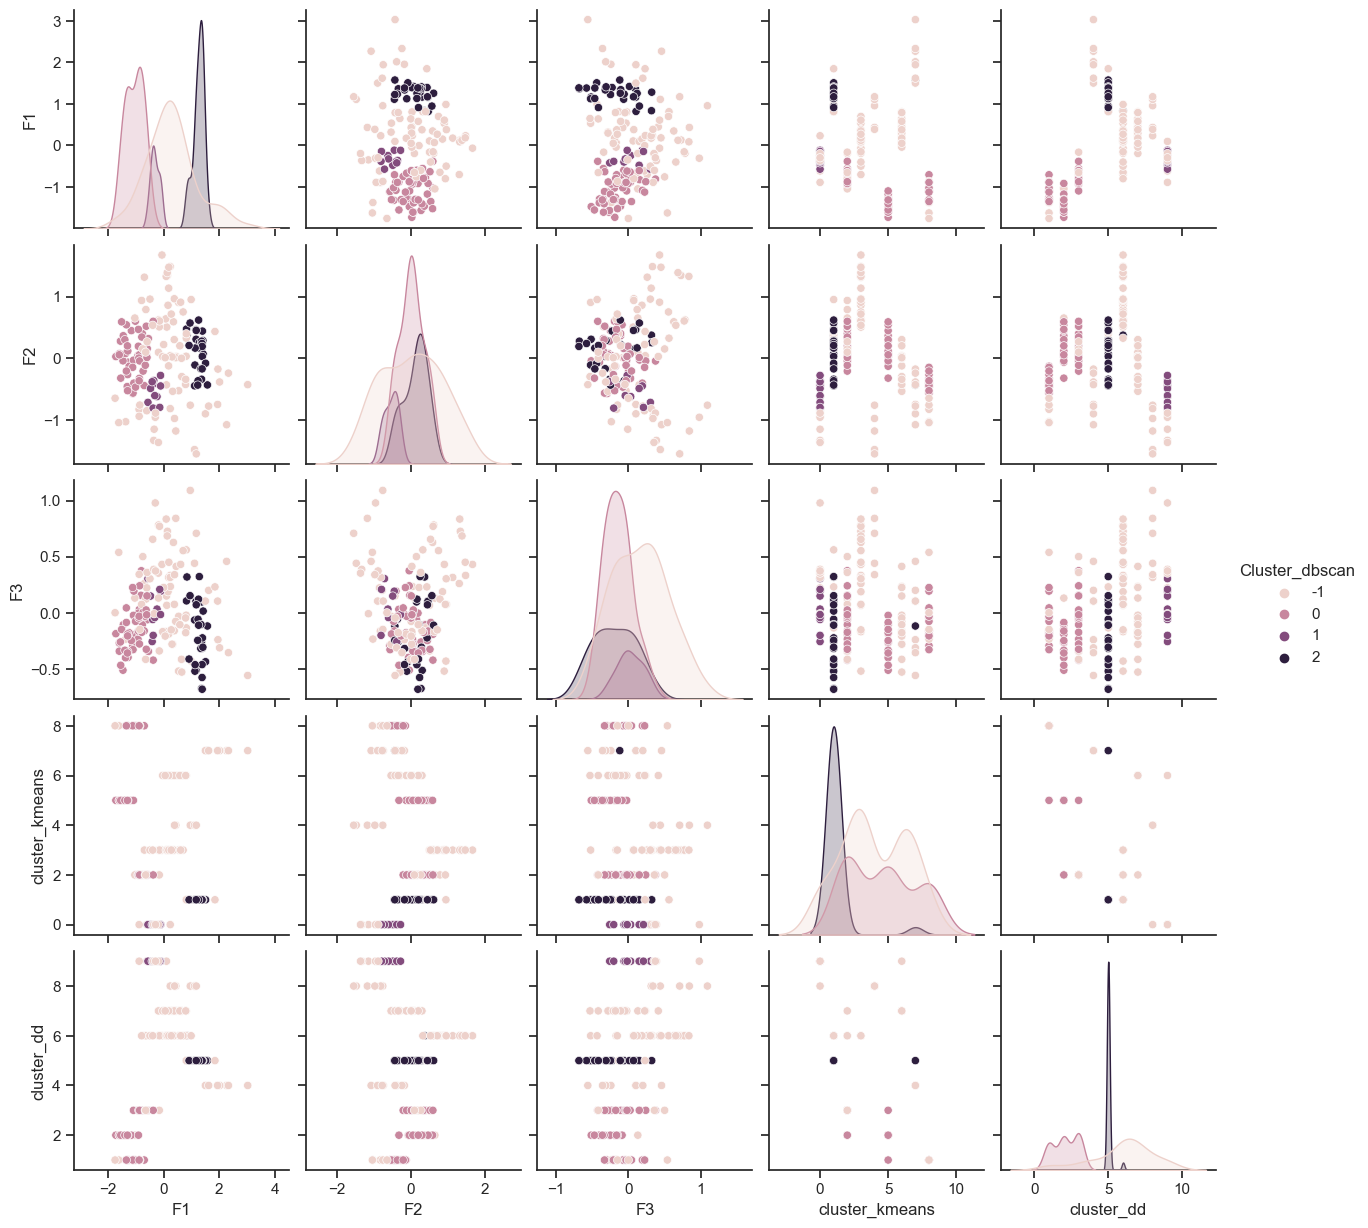

In [357]:
import seaborn as sns
sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")
sns.pairplot(df, hue="Cluster_dbscan")